In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open('logins.json') as f:
   df = json.load(f)

df = pd.DataFrame(df)

In [3]:
df.index = df['login_time']

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [6]:
df_resampled = df.resample('15min').apply('count')

In [7]:
df_resampled = df_resampled.rename(columns = {'login_time':'count'})

In [8]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [9]:
df_resampled

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


<AxesSubplot:xlabel='login_time'>

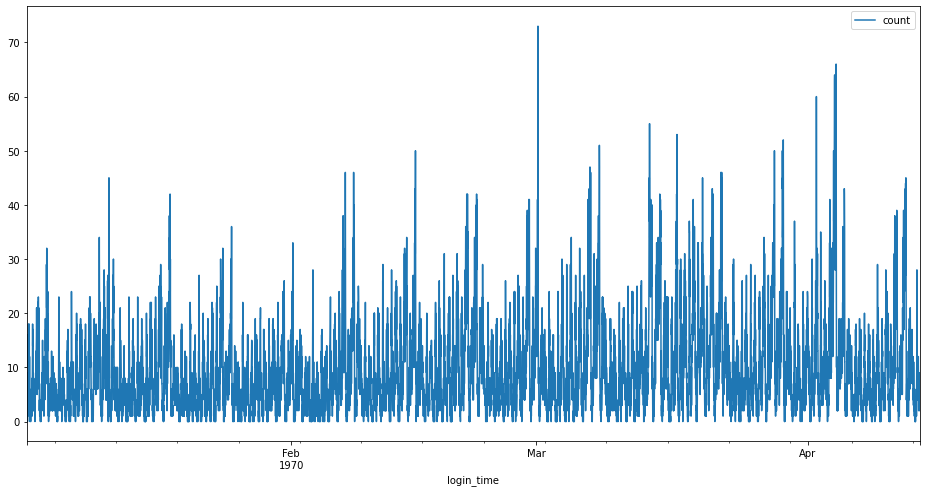

In [10]:
df_resampled.plot(kind='line',figsize=(16,8))

Here we see a graph of login counts from 15 minute intervals from January to April 1970. 

In [11]:
df_resampled.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


The mean number of logins per interval is 9.51 with a max of 73 logins. We can see from the data and the graph that the number of logins flucuates wildly. Most of the time it will fall between 3 - 13 logins. What is causing all the changes in logins? We should look at the day of the week has the most activity 

In [12]:
df_resampled['week_day'] = df_resampled.index.weekday

In [13]:
df_resampled

,count,week_day
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
1970-01-01 21:15:00,4,3
1970-01-01 21:30:00,0,3
1970-01-01 21:45:00,4,3
1970-01-01 22:00:00,9,3


In [14]:
df_resampled.groupby('week_day').mean()

,count
week_day,
0,6.213380
1,6.895833
2,7.692708
3,8.794118
4,10.561111
5,13.456250
6,12.615972


Most of the activity in our data follows a trend. The mean number of logins is the lowest on a monday, and steadly increases until it reaches a peak on the weekends.

In [15]:
df_resampled_day = df.resample('1D').count()
df_resampled_day = df_resampled_day.rename(columns = {'login_time':'count'})

In [16]:
df_resampled_day

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
1970-01-06,536
1970-01-07,648
1970-01-08,625
1970-01-09,881


<AxesSubplot:xlabel='login_time'>

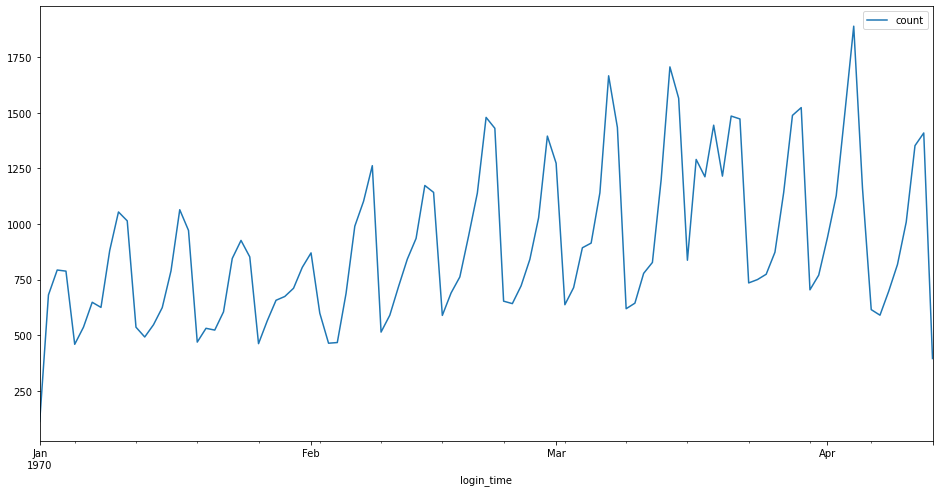

In [17]:
df_resampled_day.plot(kind='line',figsize=(16,8))

Resampling to daily frequency shows there is an increasing amount of average logins per day. January, sees the least amount of logins, with each month after january, seeing an increase in the amount of logins.

In [18]:
df_resampled_week = df.resample('W').count()
df_resampled_week = df_resampled_week.rename(columns = {'login_time':'count'})

<AxesSubplot:xlabel='login_time'>

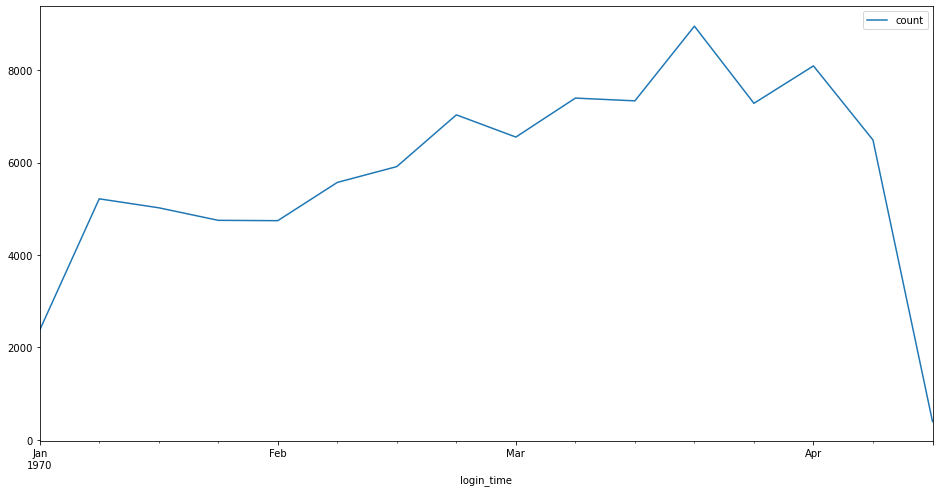

In [19]:
df_resampled_week.plot(kind='line',figsize=(16,8))

Looking at weekly data, I was hoping to gain an insight on if there was a trend on which weeks in a month has the most logins, but it seems like the logins were steadily increasing each week. there are slight dips at the end of Feb and Mar, which could just be from normal variance, but looking at our data, it does not seem apparent that the position of the week in the month is a factor in number of logins. 

In [20]:
df_resampled.index.date

array([datetime.date(1970, 1, 1), datetime.date(1970, 1, 1),
       datetime.date(1970, 1, 1), ..., datetime.date(1970, 4, 13),
       datetime.date(1970, 4, 13), datetime.date(1970, 4, 13)],
      dtype=object)

In [21]:
df_resampled

,count,week_day
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
1970-01-01 21:15:00,4,3
1970-01-01 21:30:00,0,3
1970-01-01 21:45:00,4,3
1970-01-01 22:00:00,9,3


In [26]:
df_daily = df_resampled

In [52]:
df_daily['Month'] = df_resampled.index.month
df_daily['Day'] = df_resampled.index.day

In [53]:
df_daily

,count,week_day,Month,Day
login_time,,,,
1970-01-01 20:00:00,2,3,1,1
1970-01-01 20:15:00,6,3,1,1
1970-01-01 20:30:00,9,3,1,1
1970-01-01 20:45:00,7,3,1,1
1970-01-01 21:00:00,1,3,1,1
1970-01-01 21:15:00,4,3,1,1
1970-01-01 21:30:00,0,3,1,1
1970-01-01 21:45:00,4,3,1,1
1970-01-01 22:00:00,9,3,1,1


<AxesSubplot:xlabel='login_time'>

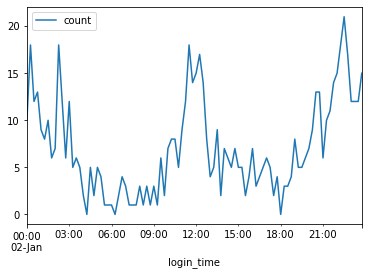

In [87]:
df_resampled['1970-01-02'].plot(y = 'count')

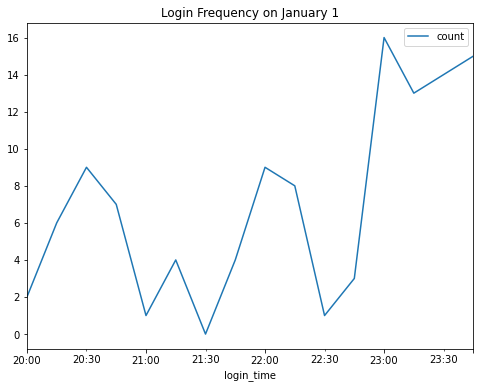

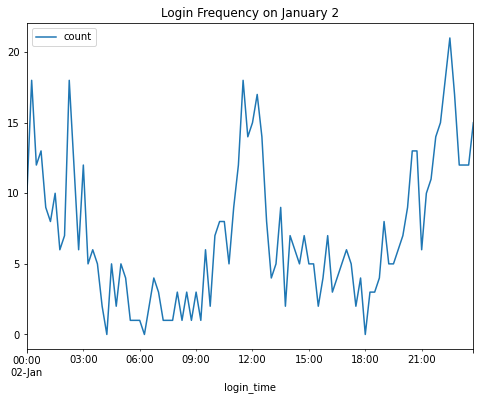

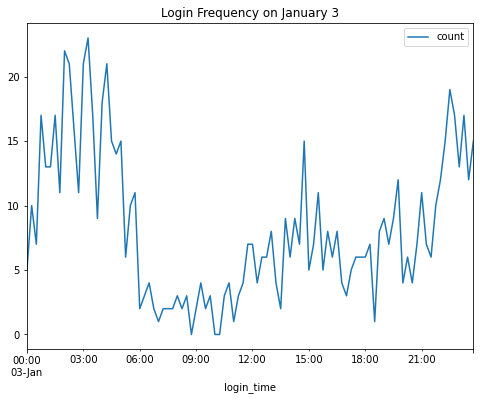

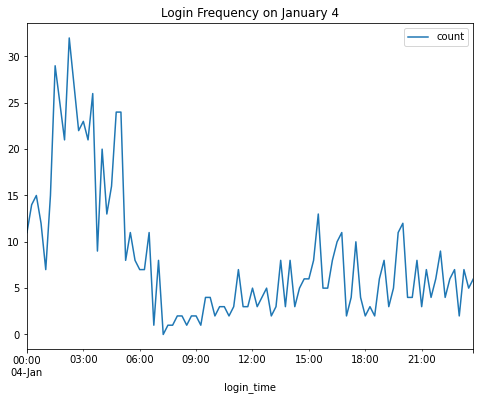

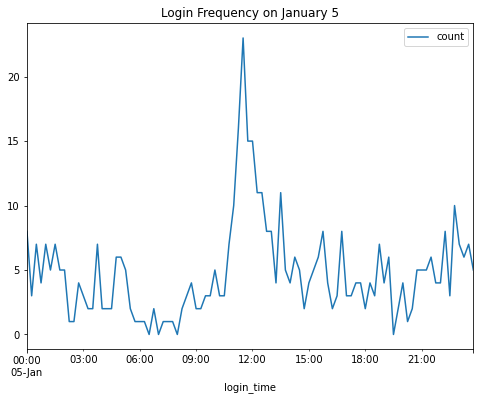

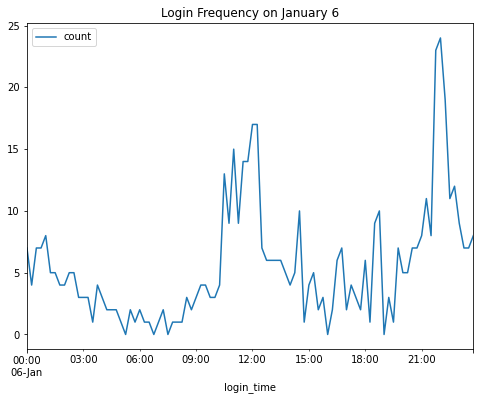

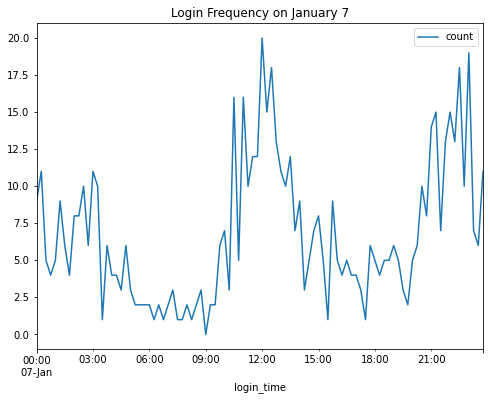

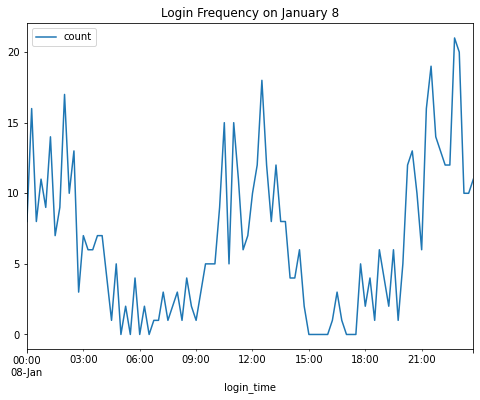

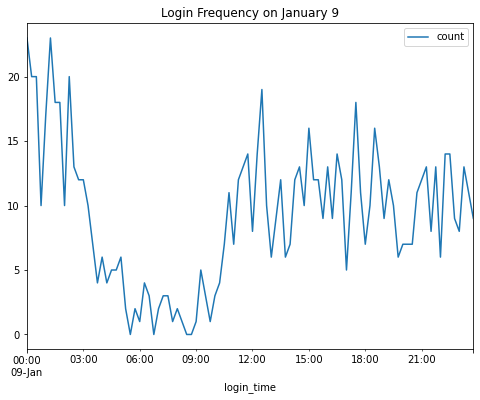

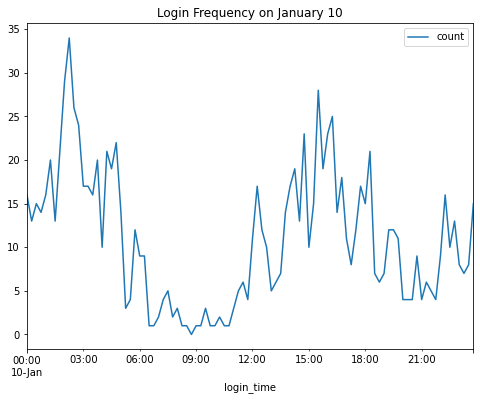

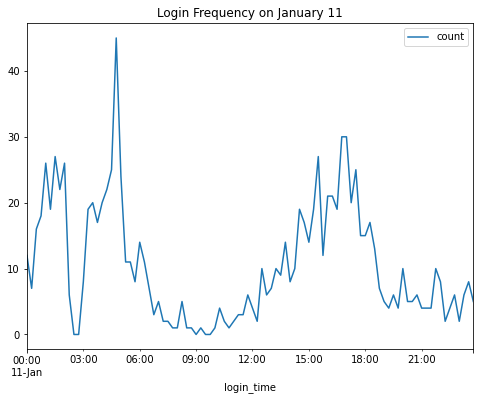

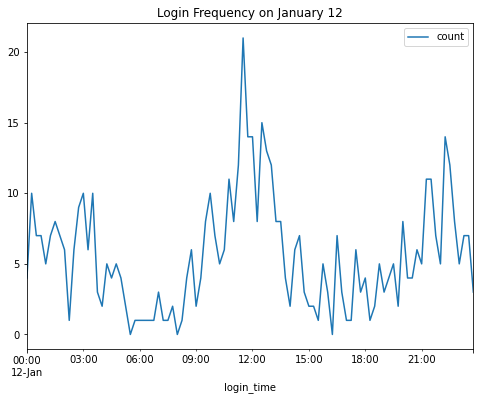

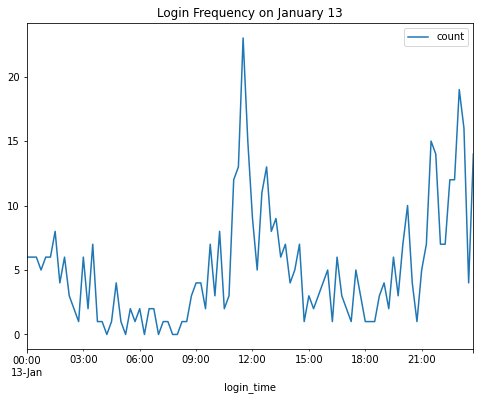

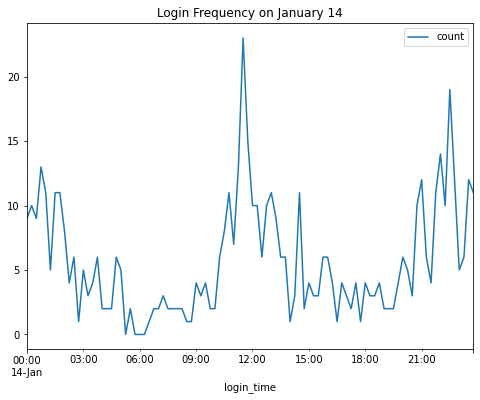

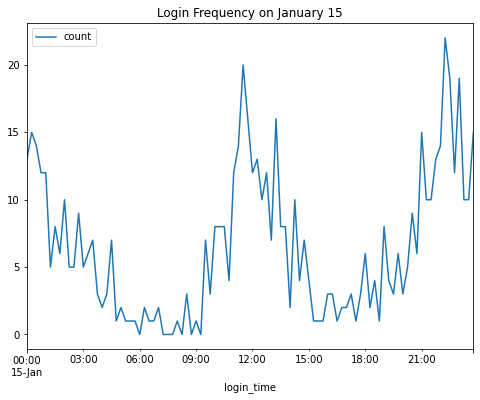

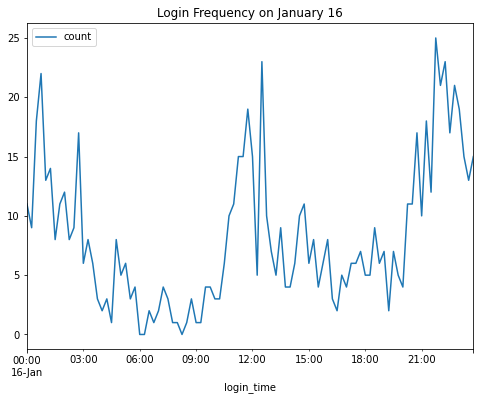

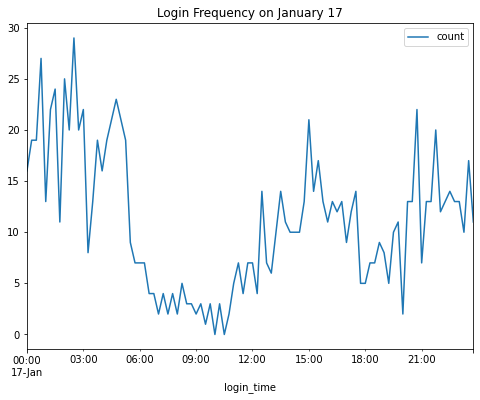

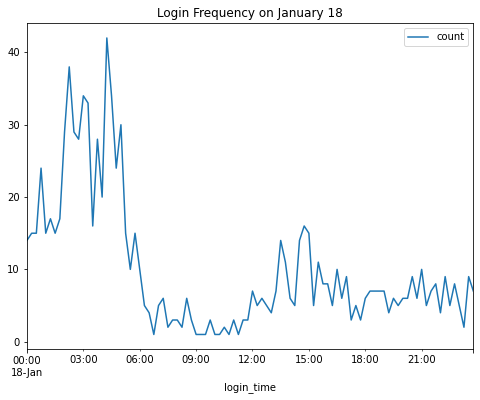

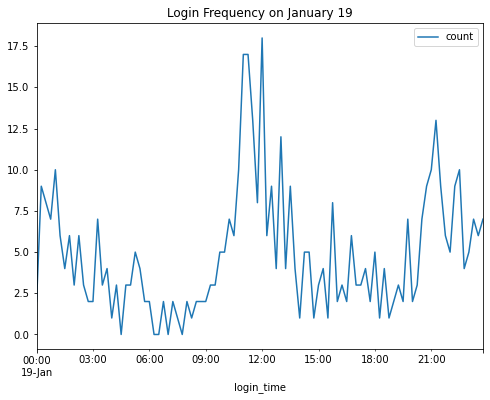

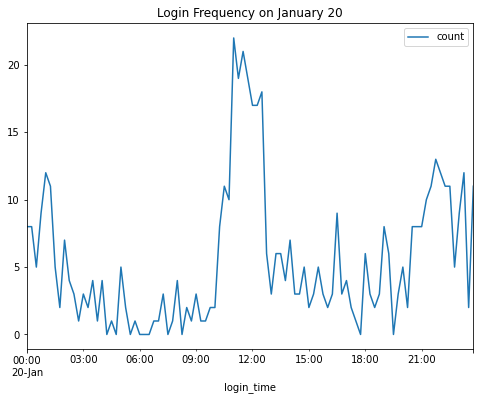

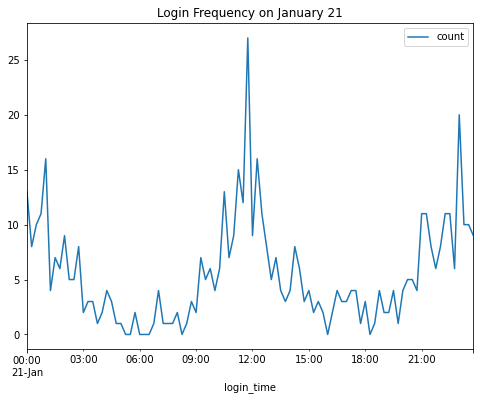

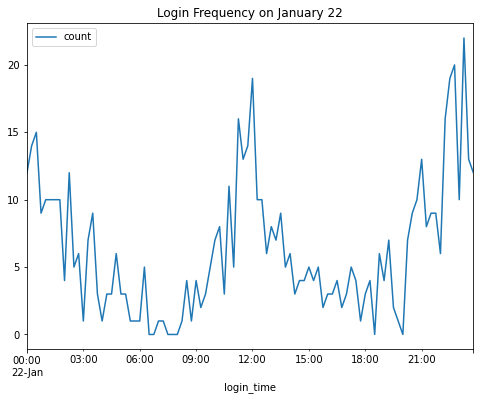

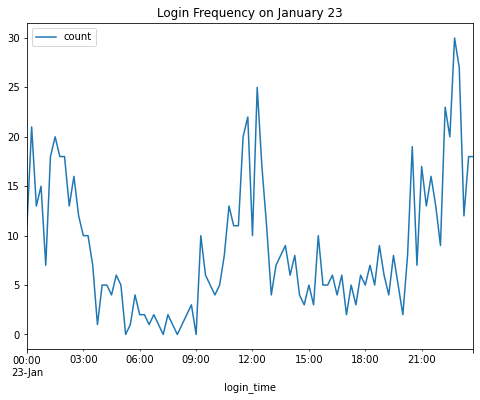

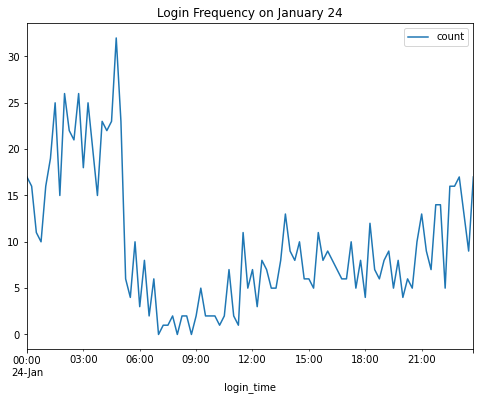

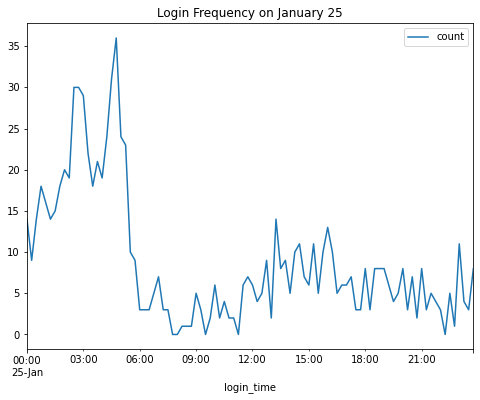

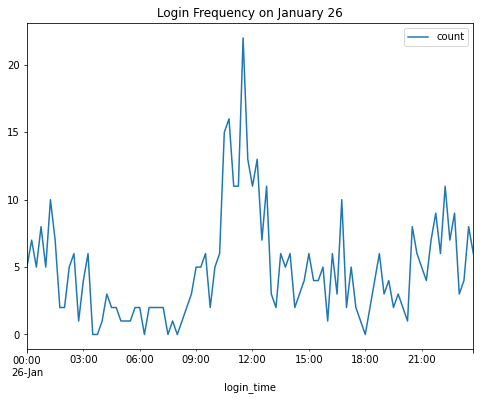

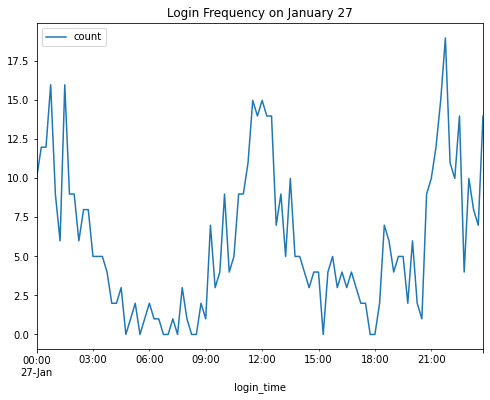

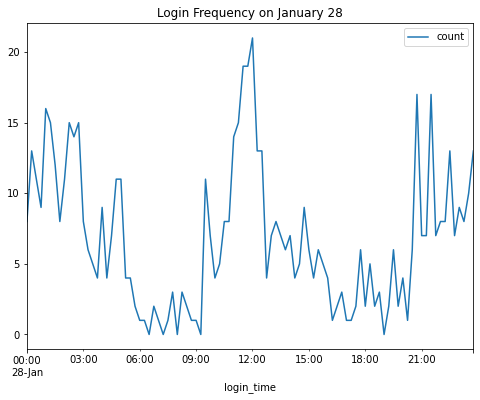

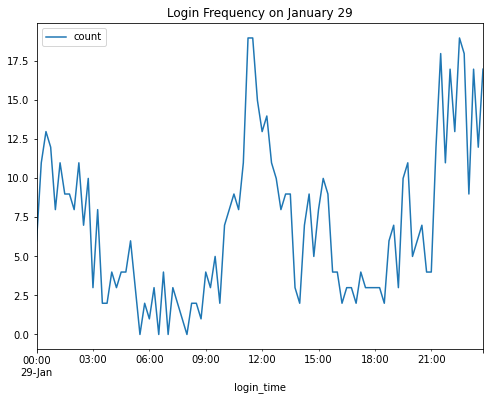

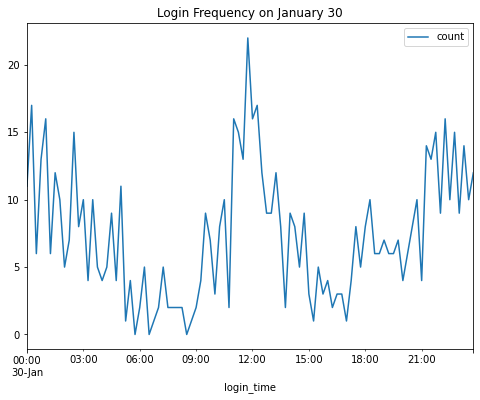

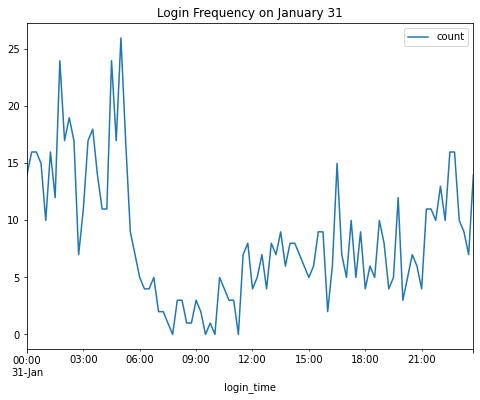

In [86]:
day = 1

for day in range(1,32):
    df_daily_plot = df_daily.loc[(df_daily['Month'] ==1) & (df_daily['Day'] == day)]
    weekday = df_daily_plot.week_day
    df_daily_plot.plot(y='count', figsize = (8,6))
    plt.title('Login Frequency on January ' + str(day))
    plt.show()

Above is the daily login data of the month of January. We can see that the frequency of logins increases on Friday, Saturday, and Sunday and decreases Monday - Thursday. 

We can also observe the time in which the frequency increases and see if there is a pattern. 

On the weekdays, it seems that the spiked in logins occurs around Noon